In [195]:
import pandas as pd
# Setting up inline plotting using jupyter notebook "magic"
%matplotlib inline

import matplotlib.pyplot as plt

# Read below thread for plotting guides
# https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [126]:
# df = pd.read_csv('data.txt', header=None)
# x_mean, y_mean = df.mean()
# print(x, y)
# df[2] = df[0] - x_mean  # mean value difference: subtract mean from all input values of training set
# df[3] = df[1] - y_mean  # mean value difference: subtract mean from all output values of training set
# df[4] = df[2] ** 2  # square of mean value difference
# df[5] = df[2] * df[3]
# beta = sum(df[5])/ sum(df[4])
# alpha = y_mean - beta*x_mean
# print(alpha, beta)

In [224]:
class StatasticalRegression(object):
    def __init__(self, dataframe_path="data.txt"):
        self.dataframe = pd.read_csv(dataframe_path, header=None)
        self.alpha, self.beta = None, None
    
    def compute_constant(self):
        x_mean, y_mean = self.dataframe.mean()
#         print("Mean X: {}\nMean Y: {}".format(x_mean, y_mean))
        self.dataframe['input_diff'] = self.dataframe[0] - x_mean  # mean value difference: subtract mean from all input values of training set
        self.dataframe['output_diff'] = self.dataframe[1] - y_mean  # mean value difference: subtract mean from all output values of training set
        self.dataframe['sqrd_input_diff'] = self.dataframe.input_diff ** 2  # square of mean value difference
        self.dataframe['mul_input_output_diff'] = self.dataframe.input_diff * self.dataframe.output_diff
#         print("Result: \n{}".format(self.dataframe))
        self.beta = sum(self.dataframe.mul_input_output_diff)/ sum(self.dataframe.sqrd_input_diff)
        self.alpha = y_mean - beta*x_mean
        return self.alpha, self.beta
    
    def hypothesis(self, feature, alpha=None, beta=None):
        if not (alpha and beta):
            alpha, beta = self.compute_constant()
        return (alpha + beta*feature)
    
    def add_predicted_values(self):
        self.dataframe['prediction'] = self.hypothesis(self.dataframe[0], alpha, beta)
    
    def draw_accuracy_plot(self):
        fig = plt.figure().add_axes((0.1, 0.2, 0.8, 0.7))
        x = range(min(self.dataframe[0]) - 10, max(self.dataframe[0]) + 10)
        fig.plot(x, [self.hypothesis(i, alpha, beta) for i in x])
        fig.scatter(self.dataframe[0], self.dataframe[1], marker='x', c="red")
        fig.set_title("Plot of statistical model")

s = StatasticalRegression()
alpha, beta = s.compute_constant()

In [197]:
s.add_predicted_values()

In [198]:
s.dataframe

,0,1,input_diff,output_diff,sqrd_input_diff,mul_input_output_diff,prediction
0,4,390,-3.642857,-155.0,13.270408,564.642857,428.600205
1,9,580,1.357143,35.0,1.841837,47.500000,588.364630
2,10,650,2.357143,105.0,5.556122,247.500000,620.317515
3,14,730,6.357143,185.0,40.413265,1176.071429,748.129054
4,4,410,-3.642857,-135.0,13.270408,491.785714,428.600205
5,7,530,-0.642857,-15.0,0.413265,9.642857,524.458860
6,12,600,4.357143,55.0,18.984694,239.642857,684.223284
7,13,790,5.357143,245.0,28.698980,1312.500000,716.176169
8,1,350,-6.642857,-195.0,44.127551,1295.357143,332.741550
9,3,400,-4.642857,-145.0,21.556122,673.214286,396.647320


Text(0.5,1,'Plot of statistical model')

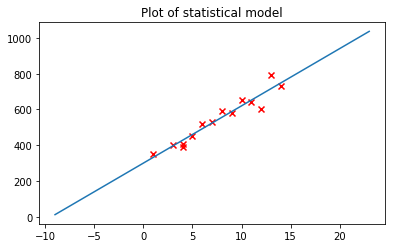

In [222]:
# s.dataframe = s.dataframe.reindex(columns=[s.dataframe[0], "prediction"])

# plt.set_xlabel('X-axis')